# SYDE 556/750 --- Assignment 4


In [419]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

# Fix the numpy random seed for reproducible results
seed = 18945 # Use this to fix Nengo seed later as well
np.random.seed(seed)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons


**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.


Build finished in 0:00:01.                                                      


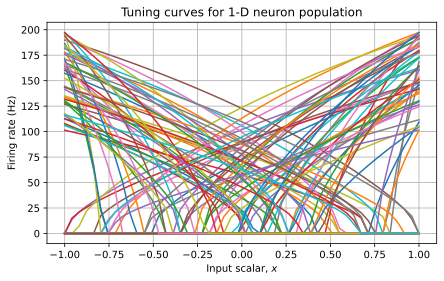

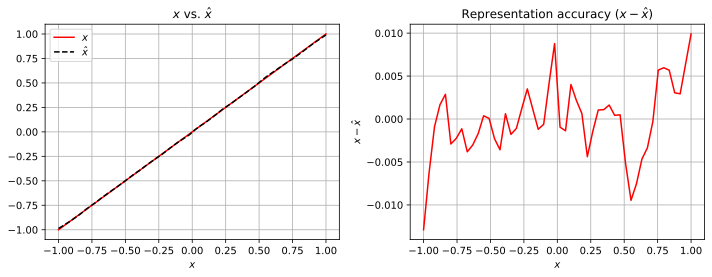

Decoding RMSE: 0.004



In [420]:
n = 100

tau_ref = 0.002
tau_rc = 0.02

a_max = np.random.uniform(100, 200, n)

model = nengo.Network()

# Create ensemble with given parameters
with model:
    ens = nengo.Ensemble(
        n_neurons = n, 
        dimensions = 1, 
        max_rates = a_max,
        radius = 1,
        neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref),
    )
    identity_connection = nengo.Connection(ens, ens)

sim = nengo.Simulator(model)

# Get tuning curves & plot
x, A = tuning_curves(ens, sim)

plt.figure(figsize=(7,4))
plt.plot(x, A)
plt.title("Tuning curves for 1-D neuron population")
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, $x$")
plt.grid(True)
plt.show()

# Decode using identity connection, pass in sorted x as ref for target values
_, targets, decoded = eval_point_decoding(identity_connection, sim, np.array(sorted(x)))

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 2)
plt.plot(targets, targets - decoded, color='red')
plt.title("Representation accuracy ($x - \hat{x}$)")
plt.ylabel("$x - \hat{x}$")
plt.xlabel("$x$")
plt.grid(True)

plt.subplot(1, 2, 1)
plt.plot(targets, targets, label='$x$', color='red')
plt.plot(targets, decoded, linestyle='--', color='black', label='$\hat{x}$')
plt.title("$x$ vs. $\hat{x}$")
plt.xlabel("$x$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Report RMSE
RMSE = np.sqrt(np.mean((targets - decoded) ** 2))
print(f"Decoding RMSE: {RMSE:.3f}\n")

**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.


Build finished in 0:00:01.                                                      
RMSE, r=0.5: 0.003

Build finished in 0:00:01.                                                      
RMSE, r=1: 0.005

Build finished in 0:00:01.                                                      
RMSE, r=2: 0.011

Build finished in 0:00:01.                                                      
RMSE, r=4: 0.018

Build finished in 0:00:01.                                                      
RMSE, r=8: 0.032

Build finished in 0:00:01.                                                      
RMSE, r=16: 0.060



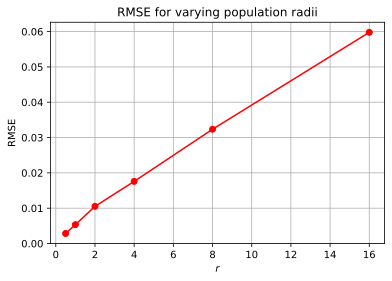

In [421]:
# Fix Nengo random seed
model = nengo.Network(label='radius experiment', seed=seed)

radii = [0.5, 1, 2, 4, 8, 16]
rmse = []

for radius in radii:
    with model:
        ens = nengo.Ensemble(
        n_neurons = n, 
        dimensions = 1, 
        max_rates = a_max,
        radius = radius,
        neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref),
        )
        identity_connection = nengo.Connection(ens, ens)

    sim = nengo.Simulator(model)
    
    x, _ = tuning_curves(ens, sim)
    _, targets, decoded = eval_point_decoding(identity_connection, sim, np.array(sorted(x)))

    RMSE = np.sqrt(np.mean((targets - decoded) ** 2))
    rmse.append(RMSE)
    print(f"RMSE, r={radius}: {RMSE:.3f}\n")

# Plot to observe mathematical relationship
plt.figure(figsize=(6, 4))
plt.plot(radii, rmse, marker='o', color='red')
plt.title("RMSE for varying population radii")
plt.xlabel("$r$")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.


The RMSE increases about linearly with the radius. Based on the outputs of the experiments, the approximate relationship is something like: $RMSE(r) = 0.005*r$, where 0.005 is the error for $r=1$.

This is because we've held the number of neurons in the ensemble constant, while increasing the range of inputs that we want them to represent. As the radius increases, the error in representation accuracy scales proportionately. Another way to look at it is that if we keep $n$ fixed, $r/n$ for increasing $r$ is a linearly changing relationship - as we increase the radius, the amount of the input space we can capture decreases linearly, so it makes sense that the RMSE for decoding also increases linearly with $r$.


**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.


Build finished in 0:00:01.                                                      
t_ref=0.001: 0.005

Build finished in 0:00:01.                                                      
t_ref=0.002: 0.005

Build finished in 0:00:01.                                                      
t_ref=0.003: 0.006

Build finished in 0:00:01.                                                      
t_ref=0.004: 0.007

Build finished in 0:00:01.                                                      
t_ref=0.005: 0.010



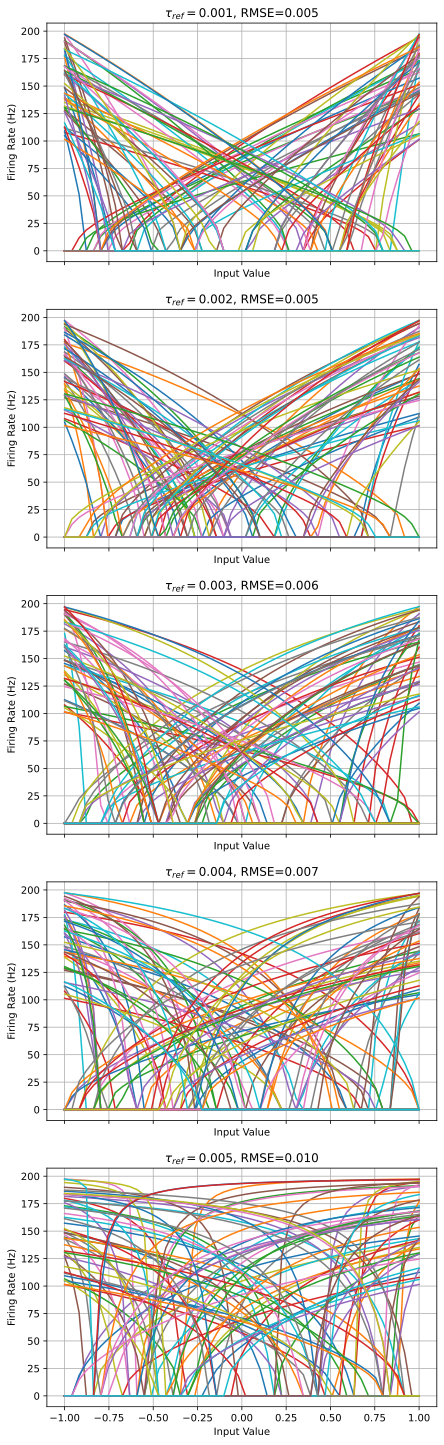

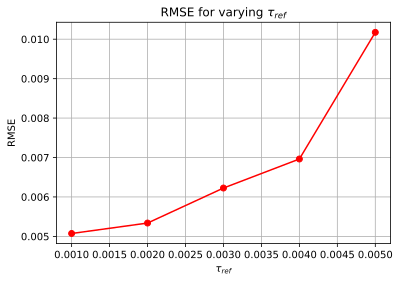

In [422]:
model = nengo.Network(label='tau ref experiment', seed=seed)

t_ref_varied = np.linspace(0.001, 0.005, 5)
rmse = []

fig, axs = plt.subplots(5, 1, figsize=(7, 25), sharex=True, sharey=True)
axs = axs.flatten() 

for i, t_ref in enumerate(t_ref_varied):
    with model:
        ens = nengo.Ensemble(
        n_neurons = n, 
        dimensions = 1, 
        max_rates = a_max,
        radius = 1,
        neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref=t_ref),
        )
        identity_connection = nengo.Connection(ens, ens)

    sim = nengo.Simulator(model)
    
    x, A = tuning_curves(ens, sim)
    _, targets, decoded = eval_point_decoding(identity_connection, sim, np.array(sorted(x)))

    RMSE = np.sqrt(np.mean((targets - decoded) ** 2))
    rmse.append(RMSE)
    print(f"t_ref={t_ref:.3f}: {RMSE:.3f}\n")

    # Plot tuning curves
    axs[i].plot(x, A)
    axs[i].set_title(f"$\\tau_{{ref}}={t_ref:.3f}$, RMSE={RMSE:.3f}")
    axs[i].set_xlabel("Input Value")
    axs[i].set_ylabel("Firing Rate (Hz)")
    axs[i].grid(True)

# Plot RMSE
plt.figure(figsize=(6, 4))
plt.plot(t_ref_varied, rmse, marker='o', color='red')
plt.title("RMSE for varying $\\tau_{ref}$")
plt.xlabel("$\\tau_{ref}$")
plt.ylabel("RMSE")
plt.grid(True)

plt.show()

**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$. Again, make sure to use the same neuron ensemble parameters in all your trials.


Build finished in 0:00:01.                                                      
RMSE, t_RC=0.010: 0.007

Build finished in 0:00:01.                                                      
RMSE, t_RC=0.033: 0.005

Build finished in 0:00:01.                                                      
RMSE, t_RC=0.055: 0.005

Build finished in 0:00:01.                                                      
RMSE, t_RC=0.077: 0.004

Build finished in 0:00:01.                                                      
RMSE, t_RC=0.100: 0.004



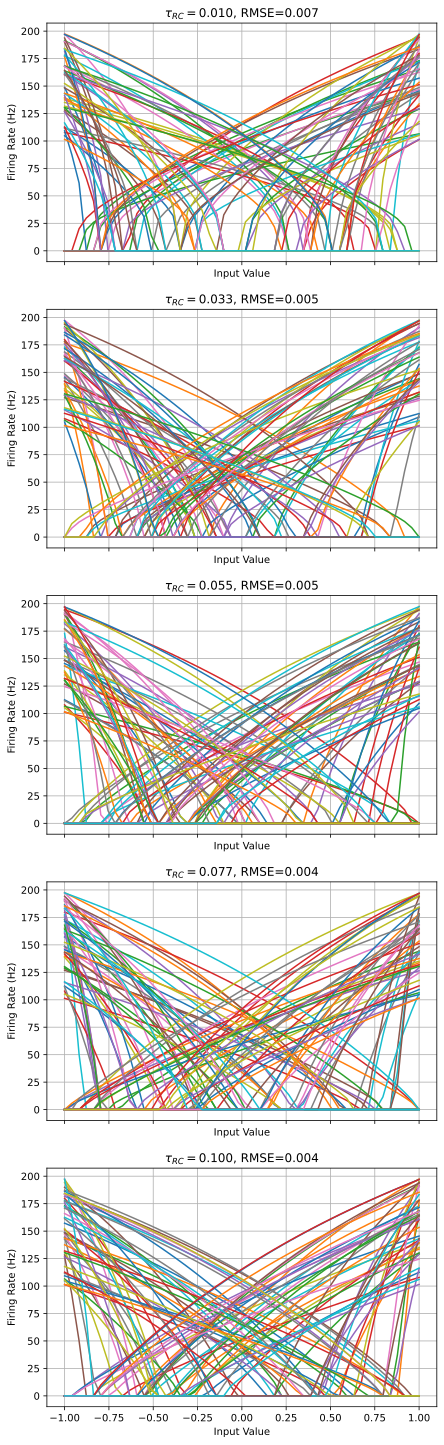

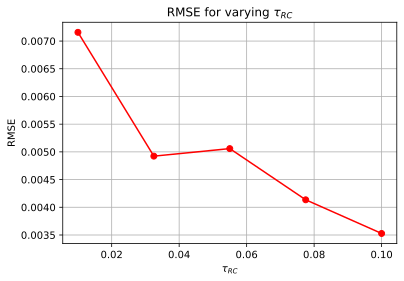

In [423]:
model = nengo.Network(label='tau RC experiment', seed=seed)

t_RC_varied = np.linspace(0.01, 0.1, 5)
rmse = []

fig, axs = plt.subplots(5, 1, figsize=(7, 25), sharex=True, sharey=True)
axs = axs.flatten() 

for i, t_RC in enumerate(t_RC_varied):
    with model:
        ens = nengo.Ensemble(
        n_neurons = n, 
        dimensions = 1, 
        max_rates = a_max,
        radius = 1,
        neuron_type = nengo.LIF(tau_rc=t_RC, tau_ref=tau_ref),
        )
        identity_connection = nengo.Connection(ens, ens)

    sim = nengo.Simulator(model)
    
    x, A = tuning_curves(ens, sim)
    _, targets, decoded = eval_point_decoding(identity_connection, sim, np.array(sorted(x)))

    RMSE = np.sqrt(np.mean((targets - decoded) ** 2))
    rmse.append(RMSE)
    print(f"RMSE, t_RC={t_RC:.3f}: {RMSE:.3f}\n")

    # Plot tuning curves
    axs[i].plot(x, A)
    axs[i].set_title(f"$\\tau_{{RC}}={t_RC:.3f}$, RMSE={RMSE:.3f}")
    axs[i].set_xlabel("Input Value")
    axs[i].set_ylabel("Firing Rate (Hz)")
    axs[i].grid(True)

# Plot RMSE
plt.figure(figsize=(6, 4))
plt.plot(t_RC_varied, rmse, marker='o', color='red')
plt.title("RMSE for varying $\\tau_{RC}$")
plt.xlabel("$\\tau_{RC}$")
plt.ylabel("RMSE")
plt.grid(True)

plt.show()

**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.


With all other parameters held constant, increasing $\tau_{ref}$ **increases** the RMSE, while increasing $\tau_{RC}$ **decreases** the RMSE.

$\tau_{ref}$, the refractory period, sets the minimum time that needs to pass between consecutive neuron spikes. As $\tau_{ref}$ increases, the neurons in the population don't spike as frequently in response to input stimulus. Because of this, when decoding from neuron activity, the "resolution" of information that the population represents is lower, so the RMSE is higher.

As $\tau_{ref}$ increases, are less sensitive to more inputs, and don't spike as easily. Once they do manage to spike, they become saturated at their maximum possible firing rate earlier. This is reflected in the shapes of the tuning curves. As we increase $\tau_{ref}$, the tuning curves tend sit at zero for most of the input range, since they're less sensitive to values that aren't in their exact preferred direction. Then, once they begin spiking, they reach their maximum firing rates quickly and plateau there.

$\tau_{RC}$, the membrane time constant, increases the time it takes for the membrane potential to charge and decay. Increasing $\tau_{RC}$ has almost a smoothing effect, where there's less sensitivity to high variation in the input signal. This results in the smoother and broader tuning curves we see in the experiment.

Increasing $\tau_{RC}$ means that slower, more stable variations in the input signal are emphasized. This improves the quality of the decoded signal and robustness to noise, which is why the RMSE gets lower.


# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


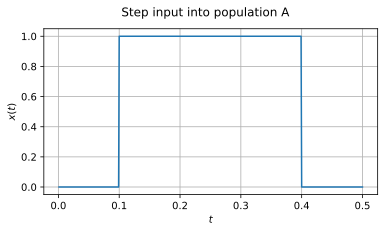

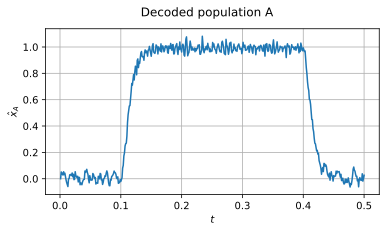

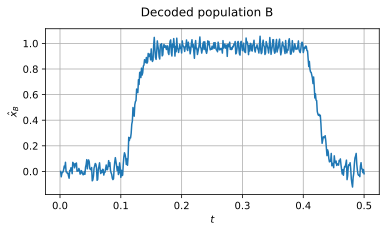

In [424]:
# Parameters for two populations
tau_ref = 0.002
tau_rc = 0.02

n_A = 100
n_B = 50

a_max_A = np.random.uniform(100, 200, n_A)
a_max_B = np.random.uniform(100, 200, n_B)

T = 0.5

model = nengo.Network()

with model:
    x = nengo.Node(nengo.processes.Piecewise({
        0.0: 0.0,
        0.1: 1.0,
        0.4: 0.0
    }))

    pop_A = nengo.Ensemble(
        n_neurons = n_A, 
        dimensions = 1, 
        max_rates = a_max_A,
        neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref),
    )

    pop_B = nengo.Ensemble(
        n_neurons = n_B, 
        dimensions = 1, 
        max_rates = a_max_B,
        neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref),
    )

    x_A_connection = nengo.Connection(x, pop_A)
    A_B_connection = nengo.Connection(pop_A, pop_B, synapse=0.01)

    probe_x = nengo.Probe(x)
    probe_A = nengo.Probe(pop_A, synapse=0.01)
    probe_B = nengo.Probe(pop_B, synapse=0.01)

sim = nengo.Simulator(model)

sim.run(T)
t = sim.trange()

plt.figure(figsize=(6,3))
plt.suptitle("Step input into population A")
plt.plot(t, sim.data[probe_x])
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.suptitle("Decoded population A")
plt.plot(t, sim.data[probe_A])
plt.ylabel("$\hat{x}_{A}$")
plt.xlabel("$t$")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.suptitle("Decoded population B")
plt.plot(t, sim.data[probe_B])
plt.ylabel("$\hat{x}_{B}$")
plt.xlabel("$t$")
plt.grid(True)
plt.show()

**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


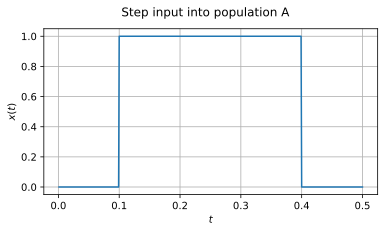

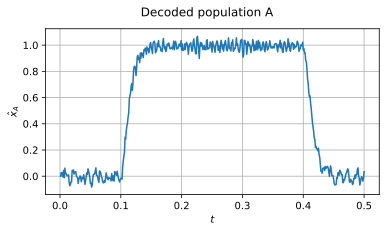

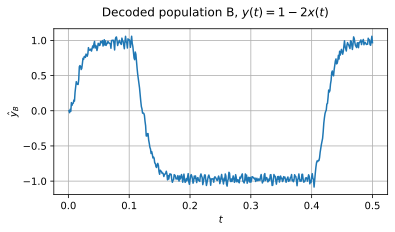

In [425]:
model = nengo.Network()

with model:
    x = nengo.Node(nengo.processes.Piecewise({
        0.0: 0.0,
        0.1: 1.0,
        0.4: 0.0
    }))

    pop_A = nengo.Ensemble(
        n_neurons = n_A, 
        dimensions = 1, 
        max_rates = a_max_A,
        neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref),
    )

    pop_B = nengo.Ensemble(
        n_neurons = n_B, 
        dimensions = 1, 
        max_rates = a_max_B,
        neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref),
    )

    x_A_connection = nengo.Connection(x, pop_A)
    # Compute transformation:    
    A_B_connection = nengo.Connection(pop_A, pop_B, synapse=0.01, function=lambda x: 1 - 2 * x)

    probe_x = nengo.Probe(x)
    probe_A = nengo.Probe(pop_A, synapse=0.01)
    probe_B = nengo.Probe(pop_B, synapse=0.01)

sim = nengo.Simulator(model)

sim.run(T)
t = sim.trange()

plt.figure(figsize=(6,3))
plt.suptitle("Step input into population A")
plt.plot(t, sim.data[probe_x])
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.suptitle("Decoded population A")
plt.plot(t, sim.data[probe_A])
plt.ylabel("$\hat{x}_{A}$")
plt.xlabel("$t$")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.suptitle("Decoded population B, $y(t)=1-2x(t)$")
plt.plot(t, sim.data[probe_B])
plt.ylabel("$\hat{y}_{B}$")
plt.xlabel("$t$")
plt.grid(True)
plt.show()

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?


The dynamical system describing a linear integrator is:

$\frac{d\mathbf{x}(t)}{dt} = \mathbf{u}(t)$

We want it in the form:

$\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$

Where:

$\mathbf{A}' = \tau \mathbf{A} + \mathbf{I}$

$\mathbf{B}' = \tau \mathbf{B}$

So, to describe the linear integrator system, we have:

$\mathbf{A} = 0 \implies \mathbf{A}' = \mathbf{I}$

$\mathbf{B} = \mathbf{I} \implies \mathbf{B}' = \tau \mathbf{I} = 0.05\mathbf{I}$

So, in the time domain, we can write the system as:

$\mathbf{x}(t) = \big(h * (\mathbf{I}\mathbf{x} + 0.05\mathbf{I}\mathbf{u})\big)(t)$

Where $h$ represents the recurrent connection post-synaptic filter.


**b) Integrator using spiking neurons.** Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


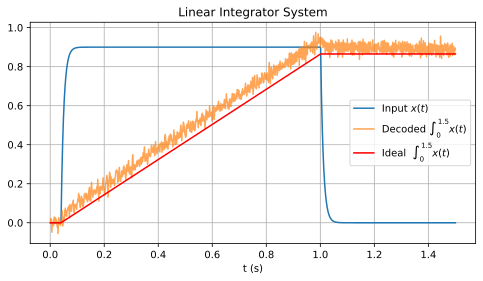

Ideal integral:

[0.     0.     0.     ... 0.8649 0.8649 0.8649]


In [426]:
def simulate_neural_integrator(input_function, T, neuron_type, n=200, tau_input=0.005, tau_ens=0.05, tau_syn=0.01):
    a_max = np.random.uniform(100, 200, n)
    model = nengo.Network()

    # Set up integrator
    with model:
        x = nengo.Node(input_function)

        ens = nengo.Ensemble(
            n_neurons = n,
            dimensions = 1,
            max_rates = a_max,
            neuron_type = neuron_type
        )

        nengo.Connection(x, ens, transform = tau_ens, synapse = tau_input)
        # Recurrent connection for integration, with the longer tau
        nengo.Connection(ens, ens, synapse = tau_ens)

        probe_x = nengo.Probe(x, synapse = tau_syn)
        probe_ens = nengo.Probe(ens, synapse = tau_syn)
    
    sim = nengo.Simulator(model)
    sim.run(T)

    t = sim.trange()
    data_x = sim.data[probe_x]
    data_ens = sim.data[probe_ens]

    # Evaluate ideal integral over time with cumsum
    integral = np.cumsum([input_function(t) for t in np.arange(0, T, sim.dt)]) * sim.dt

    # Return input, decoded output, and ideal output
    return t, data_x, data_ens, integral

step_input = lambda t: 0.9 if 0.04 <= t <= 1.0 else 0

t, input, integral_output, integral_ideal = simulate_neural_integrator(
        step_input, 
        T=1.5, 
        neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref)
    )

# Plot results
plt.figure(figsize=(8, 4))
plt.title("Linear Integrator System")
plt.plot(t, input, label='Input $x(t)$')
plt.plot(t, integral_output, label="Decoded $\int_{0}^{1.5}x(t)$", alpha=0.7)
plt.plot(t, integral_ideal, label="Ideal  $\int_{0}^{1.5}x(t)$", color="red")
plt.xlabel("t (s)")
plt.legend()
plt.grid(True)
plt.show()

print("Ideal integral:\n")
print(integral_ideal[:])

**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?


The integral of $x(t)$ for $t \in [0, 1.5]$ can be written as:

$$
\int_0^{1.5} x(t) \, dt = \int_0^{0.04} 0 \, dt + \int_{0.04}^{1.0} 0.9 \, dt + \int_{1.0}^{1.5} 0 \, dt
$$

Then, evaluating each term case-by-case:

1. For $t \in [0, 0.04]$:

   $$
   \int_0^{0.04} 0 \, dt = 0
   $$

2. For $t \in [0.04, 1.0]$:

   $$
   \int_{0.04}^{1.0} 0.9 \, dt = 0.9 \int_{0.04}^{1.0} 1 \, dt = 0.9 \left[ t \right]_{0.04}^{1.0} = 0.9 (1.0 - 0.04) = 0.9(0.96) = 0.864
   $$

3. For $t \in [1.0, 1.5]$:
   $$
   \int_{1.0}^{1.5} 0 \, dt = 0
   $$

This results in:

$$
\int_0^{1.5} x(t) \, dt = 0 + 0.864 + 0 = 0.864
$$

Which aligns with the resulting value of the ideal integral. The simulated integral value over time aligns with the ideal integral as well. There are some discrepancies, most notably the fact that it looks noisier, since we're simulating the value using an ensemble of neurons which cannot represent the original step function perfectly (as we saw in Question 2), and also introduces error in the recurrent connection to itself and decoding under noise.

Also, generally, the ideal equation for describing the integral is:

$$
\int_{0}^{t} 0.9 \, dt = 0.9t
$$

We can see from the plot that the output approximately follows this relationship when the step function is nonzero. Otherwise, the discrepancies we see are from the way we've set up our neuron ensemble to integrate in the form of a recurrent connection that essentialy computes a sum over time. The integral starts at zero when the step function is $0$, then follows $0.9t$, then instead of going back to zero when the step input goes back to zero, it remains at the value it previously reached.


**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


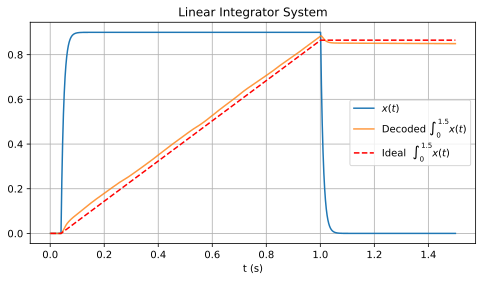

In [427]:
# Change to LIFRate neuron
t, input, integral_output, integral_ideal = simulate_neural_integrator(
        step_input, 
        T=1.5, 
        neuron_type=nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
    )

# Plot results
plt.figure(figsize=(8, 4))
plt.title("Linear Integrator System")
plt.plot(t, input, label='$x(t)$')
plt.plot(t, integral_output, label="Decoded $\int_{0}^{1.5}x(t)$", alpha=0.8)
plt.plot(t, integral_ideal, label="Ideal  $\int_{0}^{1.5}x(t)$", linestyle="dashed", color="red")
plt.xlabel("t (s)")
plt.legend()
plt.grid(True)
plt.show()

**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?


With a regular LIF model, the decoded output is constructed from the combination of each neuron's spikes in the population, which results in noisier, more disjointed output, since discrete spikes can't represent the input space in a smooth, continuous manner.

On the other hand, LIF rate neurons approximate average the neurons' firing rates over time rather than decoding from discrete spikes, leading to the much smoother decoded result we see above. We still deviate slightly from the ideal integral, since we're still using a finite population of neurons that are limited in how quickly they can respond to the input signal. Not all values of the input can be represented perfectly, especially given that the step input changes very abruptly.


**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


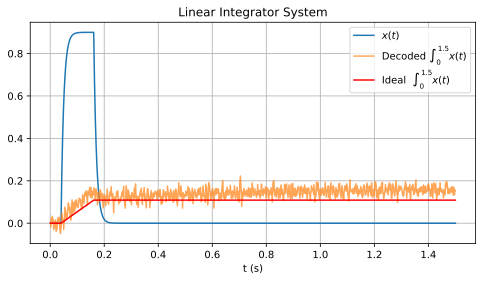

Ideal integral:

[0.     0.     0.     ... 0.1089 0.1089 0.1089]


In [428]:
step_input = lambda t: 0.9 if 0.04 <= t <= 0.16 else 0

# Back to spiking mode
t, input, integral_output, integral_ideal = simulate_neural_integrator(
        step_input, 
        T=1.5, 
        neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref)
    )

# Plot results
plt.figure(figsize=(8, 4))
plt.title("Linear Integrator System")
plt.plot(t, input, label='$x(t)$')
plt.plot(t, integral_output, label="Decoded $\int_{0}^{1.5}x(t)$", alpha=0.7)
plt.plot(t, integral_ideal, label="Ideal  $\int_{0}^{1.5}x(t)$", color="red")
plt.xlabel("t (s)")
plt.legend()
plt.grid(True)
plt.show()

print("Ideal integral:\n")
print(integral_ideal[:])

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?


Evaluating the integral for the shorter step function $x(t)$ over $t \in [0, 1.5]$:

$$
\int_0^{1.5} x(t) \, dt =  \int_0^{0.04} 0 \, dt + \int_{0.04}^{0.16} 0.9 \, dt + \int_{0.16}^{1.5} 0 \, dt
$$

This simplifies to:

$$
\int_0^{1.5} x(t) \, dt = \int_{0.04}^{0.16} 0.9 \, dt
$$

$$
= \int_{0.04}^{0.16} 0.9 \, dt = 0.9 (0.16 - 0.04) = 0.108
$$

This time, the system tends to struggle a lot more with settling near the ideal integral value (based on multiple trials - depends on randomness). This step input is a lot more "quick", but we're working with a system of neurons that are limited in how quickly they can respond based on biological dynamics (i.e. their refractory period). Because the input changes so abruptly, the ensemble struggles to capture the exact value of the function through spiking before the function value suddenly dives back down to zero.

As before, the ideal equation with the step input is nonzero is $0.9t$. The simulated integral follows this between 0.04 and 0.16 seconds. For the same reasons as before, due to the fact that we're using a neuron ensemble with a recurrent connection to integrate, the simulated integral stays at $\approx 0.108$ when the step input goes back to $0$.


**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


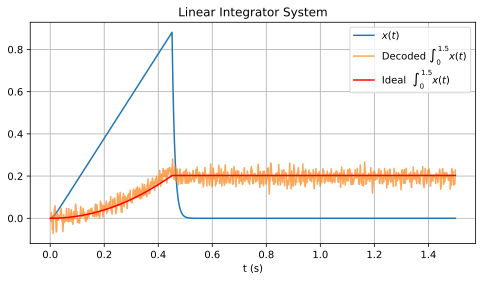

Ideal integral:

[0.0000e+00 2.0000e-06 6.0000e-06 ... 2.0295e-01 2.0295e-01 2.0295e-01]


In [429]:
ramp_input = lambda t: 0.9 * t / 0.45 if 0 <= t <= 0.45 else 0

t, input, integral_output, integral_ideal = simulate_neural_integrator(
        ramp_input, 
        T=1.5, 
        neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref)
    )

# Plot results
plt.figure(figsize=(8, 4))
plt.title("Linear Integrator System")
plt.plot(t, input, label='$x(t)$')
plt.plot(t, integral_output, label="Decoded $\int_{0}^{1.5}x(t)$", alpha=0.7)
plt.plot(t, integral_ideal, label="Ideal  $\int_{0}^{1.5}x(t)$", color="red")
plt.xlabel("t (s)")
plt.legend()
plt.grid(True)
plt.show()

print("Ideal integral:\n")
print(integral_ideal[:])

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?


The output from the ensemble closely follows the shape of the ideal integral of the ramp input over time. Evaluating the exact value of input $x(t)$ over $t \in [0, 1.5]$:

$$
\int_0^{1.5} x(t) \, dt = \int_0^{0.45} 2t \, dt + \int_{0.45}^{1.5} 0 \, dt.
$$

$$
= 2 \int_0^{0.45} t \, dt
$$

$$
= \left[ t^2 \right]_0^{0.45} = (0.45)^2 - 0 = 0.203.
$$

This time, the ideal equation over time is quadratic instead of linear, based on the function we calculated above. So from $t \in [0, 0.45]$ the simulated integral results follow the $t^2$ curve. Then, they plateau near the resulting ideal value.


**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


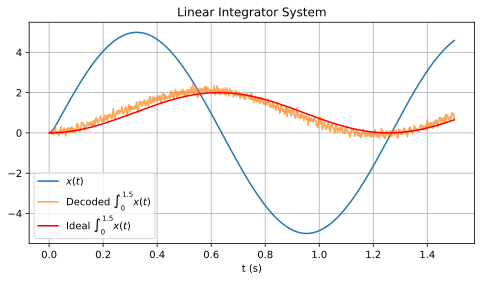

In [430]:
# Re-define simulator function with adjustable r, since we need r=5 to represent this input:
def simulate_neural_integrator(input_function, T, neuron_type, r=5, n=200, tau_input=0.005, tau_ens=0.05, tau_syn=0.01):
    a_max = np.random.uniform(100, 200, n)
    model = nengo.Network()

    # Set up integrator
    with model:
        x = nengo.Node(input_function)

        ens = nengo.Ensemble(
            n_neurons = n,
            dimensions = 1,
            max_rates = a_max,
            radius=r,
            neuron_type = neuron_type
        )

        nengo.Connection(x, ens, transform = tau_ens, synapse = tau_input)
        # Recurrent connection for integration, with the longer tau
        nengo.Connection(ens, ens, synapse = tau_ens)

        probe_x = nengo.Probe(x, synapse = tau_syn)
        probe_ens = nengo.Probe(ens, synapse = tau_syn)
    
    sim = nengo.Simulator(model)
    sim.run(T)

    t = sim.trange()
    data_x = sim.data[probe_x]
    data_ens = sim.data[probe_ens]

    # Evaluate ideal integral over time with cumsum
    integral = np.cumsum([input_function(t) for t in np.arange(0, T, sim.dt)]) * sim.dt

    # Return input, decoded output, and ideal output
    return t, data_x, data_ens, integral


sinusoidal_input = lambda t: 5 * np.sin(5 * t)

t, input, integral_output, integral_ideal = simulate_neural_integrator(
        sinusoidal_input, 
        T=1.5, 
        neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref)
    )

# Plot results
plt.figure(figsize=(8, 4))
plt.title("Linear Integrator System")
plt.plot(t, input, label='$x(t)$')
plt.plot(t, integral_output, label="Decoded $\int_{0}^{1.5}x(t)$", alpha=0.7)
plt.plot(t, integral_ideal, label="Ideal $\int_{0}^{1.5}x(t)$", color="red")
plt.xlabel("t (s)")
plt.legend()
plt.grid(True)
plt.show()

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?


Evaluating the definite integral, using $u$-substitution:

$$
\int_{0}^{1.5} 5 \sin(5t) \, dt
$$

$$
= 5 \int_{0}^{7.5} \sin(u) \frac{1}{5} \, du
$$

$$
= \left[-\cos(u)\right]_{0}^{7.5} = 0.653
$$

And the equation of the represented integral over time should be:

$$
\int_0^{t} 5 \sin(5t) \, dt = -\cos(5t)
$$

However, the results don't actually follow $-\cos(5t)$ exactly. The value of this function is $-1$ when $t=0$. We've implemented the integrator system simply as a recurrent connection from a neuron ensemble to itself, which represents an accumulation of the represented $x(t)$ over time. For example, the input function starts at the value $0$, then gradually increases, and we see this reflected in the ideal and decoded integral.

The resulting integral _does_ have an amplitude of 1, and a period of $2\pi/5 \approx 1.2$, which are characteristics of $-\cos(5t)$, so the overall shape and trend looks as expected. It's just out of phase and not centered at 0, due to how we've set up our system of neurons to perform integration.


**l) Controlled integrator.** Implement a controlled integrator over two popoulations. Demonstrate that it's working as expected.


For a control integrator, we want to include a function $c(t)$ in our integration system that represents a control signal over time. This control signal will be multiplied with the input function to determine "how much" of the input we want to accumulate into our integral at every time step, $t$.

So, we can write the controlled integrator system as:

$$
u = \frac{d(x(t)c(t))}{dt}
$$

This is a nonlinear system. To implement it over two populations, we'll have $x(t)$ and $c(t)$ as inputs. These inputs can connect to a 2D neuron ensemble, which connects to another ensemble with the transformation of multiplying the two dimension channels together, to simulate $x(t)c(t)$. Then, the second ensemble will have a connection to itself, as before, to simulate integration over time.

The controlled integrator is implemented below, and tested simiularly to the previous system with a step, ramp, and sinusoid function, with various step controls. We can see from the plots that as we move along the input function over time, the control input might allow us to include the full value in our integral, or part of the value, or none. The resulting simulated integral reflects this, and also tends to closely follow the ideal integral which is also calculated.


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


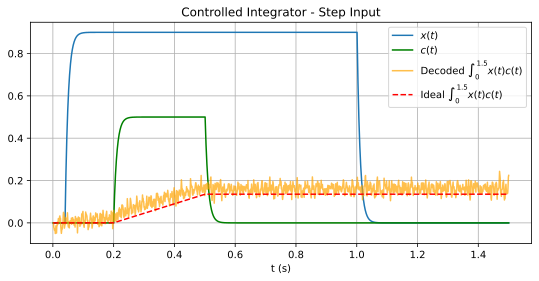

Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


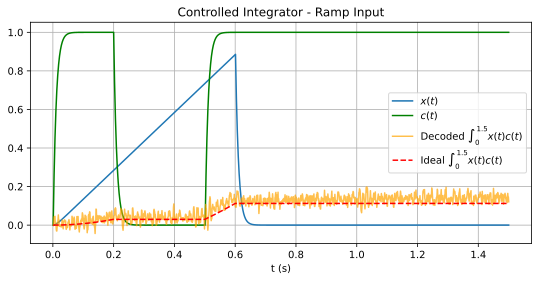

Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


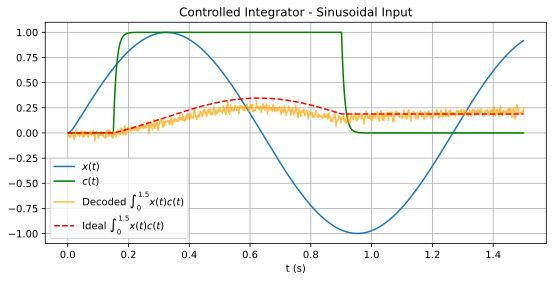

In [431]:
import nengo
import numpy as np

def simulate_controlled_integrator(input_function, control_function, T, neuron_type, n=200, tau_input=0.005, tau_ens=0.05, tau_syn=0.01):
    a_max = np.random.uniform(100, 200, n)

    model = nengo.Network()

    with model:
        x = nengo.Node(input_function)
        c = nengo.Node(control_function)

        # Product ensemble: 2D, takes x(t) and c(t)
        product_ens = nengo.Ensemble(
            n_neurons=n,
            dimensions=2,
            max_rates=a_max,
            neuron_type=neuron_type
        )

        # Integrator ensemble: will connect to itself
        integrator_ens = nengo.Ensemble(
            n_neurons=n,
            dimensions=1,
            max_rates=a_max,
            neuron_type=neuron_type
        )

        # x(t) and c(t) to product ensemble
        nengo.Connection(x, product_ens[0])
        nengo.Connection(c, product_ens[1])

        # Product ensemble to integrator ensemble, function between them is x(t) * c(t)
        nengo.Connection(
            product_ens, 
            integrator_ens, 
            function=lambda x: x[0] * x[1],
            transform=tau_ens, 
            synapse=tau_input
        )

        # Integrator ensemble to itself, to integrate result
        nengo.Connection(integrator_ens, integrator_ens, synapse=tau_ens)

        probe_x = nengo.Probe(x, synapse=tau_syn)
        probe_c = nengo.Probe(c, synapse=tau_syn)
        probe_ens = nengo.Probe(integrator_ens, synapse=tau_syn)
    
    sim = nengo.Simulator(model)
    sim.run(T)

    t = sim.trange()
    data_x = sim.data[probe_x]
    data_c = sim.data[probe_c]
    data_ens = sim.data[probe_ens]

    # Calculate ideal integral * control
    ideal = np.zeros_like(t)
    for i in range(1, len(t)):
        ideal[i] = ideal[i-1] + input_function(t[i]) * control_function(t[i]) * sim.dt

    return t, data_x, data_c, data_ens, ideal

T = 1.5
neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref)
step_input = lambda t: 0.9 if 0.04 <= t <= 1.0 else 0
control_signal = lambda t: 0.5 if 0.2 <= t <= 0.5 else 0

# Test 1: Step Input
plt.figure(figsize=(9, 4))
t, input_data, control, output, ideal = simulate_controlled_integrator(step_input, control_signal, T, neuron_type)
plt.plot(t, input_data, label='$x(t)$')
plt.plot(t, control, label='$c(t)$', color='green')
plt.plot(t, output, label='Decoded $\int_{0}^{1.5}x(t)c(t)$', color='orange', alpha=0.7)
plt.plot(t, ideal, label='Ideal $\int_{0}^{1.5}x(t)c(t)$', linestyle='--', color='red')
plt.title('Controlled Integrator - Step Input')
plt.xlabel('t (s)')
plt.grid(True)
plt.legend()
plt.show()

# Test 2: Ramp Input
ramp_input = lambda t: 0.9 * t / 0.6 if 0 <= t <= 0.6 else 0
control_signal = lambda t: 0 if 0.2 <= t <= 0.5 else 1

plt.figure(figsize=(9, 4))
t, input_data, control, output, ideal = simulate_controlled_integrator(ramp_input, control_signal, T, neuron_type)
plt.plot(t, input_data, label='$x(t)$')
plt.plot(t, control, label='$c(t)$', color='green')
plt.plot(t, output, label='Decoded $\int_{0}^{1.5}x(t)c(t)$', color='orange', alpha=0.7)
plt.plot(t, ideal, label='Ideal $\int_{0}^{1.5}x(t)c(t)$', linestyle='--', color='red')
plt.title('Controlled Integrator - Ramp Input')
plt.xlabel('t (s)')
plt.grid(True)
plt.legend()
plt.show()

# Test 3: Sinusoidal Input
sinusoidal_input = lambda t: np.sin(5 * t)
control_signal = lambda t: 1.0 if 0.15 <= t <= 0.9 else 0

plt.figure(figsize=(9, 4))
t, input_data, control, output, ideal = simulate_controlled_integrator(sinusoidal_input, control_signal, T, neuron_type)
plt.plot(t, input_data, label='$x(t)$')
plt.plot(t, control, label='$c(t)$', color='green')
plt.plot(t, output, label='Decoded $\int_{0}^{1.5}x(t)c(t)$', color='orange', alpha=0.7)
plt.plot(t, ideal, label='Ideal $\int_{0}^{1.5}x(t)c(t)$', linestyle='--', color='red')
plt.title('Controlled Integrator - Sinusoidal Input')
plt.xlabel('t (s)')
plt.grid(True)
plt.legend()
plt.show()

**m) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected


✍ \<YOUR SOLUTION HERE\>


In [432]:
# ✍ <YOUR SOLUTION HERE>